In [55]:
import requests as req
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd


In [56]:
html = req.get("https://www.worldometers.info/coronavirus/")


**1.** **Parse HTML**

In [57]:
# Converting the html to python object
html_parsed = BeautifulSoup(html.content)

# Finding the table that we want
table = html_parsed.find("table", attrs = {"id": "main_table_countries_today"})


In [58]:
# Getting all the rows

rows = table.find_all("tr")

rows[0]

<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width="30">Active Cases/1M pop</th>
</tr>

In [59]:
rows[0].text.strip()

'#\nCountry,Other\nTotalCases\nNewCases\nTotalDeaths\nNewDeaths\nTotalRecovered\nNewRecovered\nActiveCases\nSerious,Critical\nTot\xa0Cases/1M pop\nDeaths/1M pop\nTotalTests\nTests/\n1M pop\n\nPopulation\nContinent\n1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl\nNew Cases/1M pop\nNew Deaths/1M pop\nActive Cases/1M pop'

In [60]:
# Tokenization

# The table of per countries starts at the 9 index

rows[9].text.strip().split("\n")

['1',
 'USA',
 '99,859,908',
 '',
 '1,099,856                                ',
 '',
 '97,366,559',
 '',
 '1,393,493',
 '2,683',
 '298,263',
 '3,285',
 '1,133,924,923',
 '3,386,819',
 '334,805,269 ',
 'North America',
 '',
 '33040',
 '',
 '',
 '4,162']

**2.** **Storing The Data** 




In [61]:
data = []

for row in rows:
  data.append(row.text.strip().split("\n")[1:5]) # Catch only the first 5 columns
  
print(data)

[['Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths'], ['', '118,343,936', '+1,064', '1,557,463'], ['', '195,575,691', '+163,224', '1,492,057'], ['', '235,607,419', '+8,794', '1,949,155'], ['', '64,570,003', '+33', '1,333,810'], ['', '12,738,753', '+10,512', '21,821'], ['', '12,685,305', '', '257,959'], ['', '15', '', '706'], ['639,521,828', '+183,627', '6,612,280', '+365'], ['USA', '99,859,908', '', '1,099,856                                '], ['India', '44,664,810', '', '530,520                                '], ['France', '37,068,088', '', '157,671                                '], ['Germany', '36,005,025', '', '155,403                                '], ['Brazil', '34,928,504', '', '688,659                                '], ['S. Korea', '26,091,539', '+54,519', '29,571                                '], ['UK', '23,930,041', '', '194,704                                '], ['Italy', '23,642,011', '', '179,436                                '], ['Japan', '23,030,330', '+74,0

In [62]:
# Creating a DataFrame

df = pd.DataFrame(data)
df.head()

,0,1,2,3
0,"Country,Other",TotalCases,NewCases,TotalDeaths
1,,"118,343,936","+1,064","1,557,463"
2,,"195,575,691","+163,224","1,492,057"
3,,"235,607,419","+8,794","1,949,155"
4,,"64,570,003",+33,"1,333,810"


In [63]:
# As our first country is ate index 9 we need to slice the dataframe

df = pd.DataFrame(data[9:], columns = data[0])
df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths
0,USA,"99,859,908",,"1,099,856"
1,India,"44,664,810",,"530,520"
2,France,"37,068,088",,"157,671"
3,Germany,"36,005,025",,"155,403"
4,Brazil,"34,928,504",,"688,659"


In [64]:
df.to_csv("covid19.csv")

**3. Visualizing The Data**

In [65]:
# getting the country and total cases columns

df_plot = df[["Country,Other","TotalCases"]]

# getting the first 10 rows
df_plot = df_plot[:10]

In [66]:
# Check the DataFrame

df_plot.head()

,"Country,Other",TotalCases
0,USA,"99,859,908"
1,India,"44,664,810"
2,France,"37,068,088"
3,Germany,"36,005,025"
4,Brazil,"34,928,504"


In [73]:
# Our TotalCases axis is a string we need to convert it to int
df_plot["TotalCases"] = df_plot["TotalCases"].apply(lambda x: str(x).replace(",","")).astype(int)

df_plot.head()

,"Country,Other",TotalCases
0,USA,99859908
1,India,44664810
2,France,37068088
3,Germany,36005025
4,Brazil,34928504


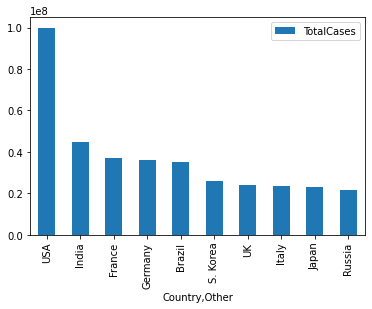

In [74]:
df_plot.plot(kind = "bar", x = "Country,Other", y = "TotalCases")